In [1]:
import  numpy  as  np 
from  sklearn  import  datasets 
import  matplotlib.pyplot  as  plt

In [2]:
class  Config: 
    nn_input_dim  =   2    #   input  layer  dimensionality 
    nn_output_dim  =   2    #   output  layer  dimensionality 
    #   Gradient  descent  parameters  (I  picked  these  by  hand) 
    epsilon  =   0.01   #   learning  rate  for  gradient  descent 
    reg_lambda  =   0.01   #   regularization  strength 

In [3]:
def  generate_data(): 
    np.random.seed(0) 
    X,  y   =   datasets.make_moons(200,  noise=0.20) 
    return  X,  y 

In [4]:
def  visualize(X,  y,  model): 
    #   plt.scatter(X[:,  0],  X[:,  1],  s=40,  c=y,  cmap=plt.cm.Spectral) 
    #   plt.show() 
    plot_decision_boundary(lambda  x:predict(model,x),  X,  y) 
    plt.title("Logistic  Regression") 

In [5]:
def  plot_decision_boundary(pred_func,  X,  y): 
    #   Set  min  and  max  values  and  give  it  some  padding 
    x_min,  x_max  =   X[:,  0].min()  -   .5,  X[:,  0].max()  +   .5 
    y_min,  y_max  =   X[:,  1].min()  -   .5,  X[:,  1].max()  +   .5 
    h   =   0.01 
    #   Generate  a   grid  of  points  with  distance  h   between  them 
    xx,  yy  =   np.meshgrid(np.arange(x_min,  x_max,  h),  np.arange(y_min,  y_max,  h))     #   Predict  the  function  value  for  the  whole  gid 
    Z   =   pred_func(np.c_[xx.ravel(),  yy.ravel()]) 
    Z   =   Z.reshape(xx.shape) 
    #   Plot  the  contour  and  training  examples 
    plt.contourf(xx,  yy,  Z,  cmap=plt.cm.Spectral) 
    plt.scatter(X[:,  0],  X[:,  1],  c=y,  cmap=plt.cm.Spectral) 
    plt.show() 


In [6]:
def  calculate_loss(model,  X,  y): 
    num_examples  =   len(X)   #   training  set  size 
    W1,  b1,  W2,  b2  =   model['W1'],  model['b1'],  model['W2'],  model['b2'] 
    #   Forward  propagation  to  calculate  our  predictions 
    z1  =   X.dot(W1)  +   b1 
    a1  =   np.tanh(z1) 
    z2  =   a1.dot(W2)  +   b2 
    exp_scores  =   np.exp(z2) 
    probs  =   exp_scores  /   np.sum(exp_scores,  axis=1,  keepdims=True) 
    #   Calculating  the  loss 
    corect_logprobs  =   -np.log(probs[range(num_examples),  y]) 
    data_loss  =   np.sum(corect_logprobs) 
    #   Add  regulatization  term  to  loss  (optional) 
    data_loss  +=  Config.reg_lambda  /   2   *   (np.sum(np.square(W1))  +   np.sum(np.square(W2))) 
    return  1.  /   num_examples  *   data_loss 


In [7]:

def  predict(model,  x): 
    W1,  b1,  W2,  b2  =   model['W1'],  model['b1'],  model['W2'],  model['b2'] 
    #   Forward  propagation 
    z1  =   x.dot(W1)  +   b1 
    a1  =   np.tanh(z1) 
    z2  =   a1.dot(W2)  +   b2 
    exp_scores  =   np.exp(z2) 
    probs  =   exp_scores  /   np.sum(exp_scores,  axis=1,  keepdims=True) 
    return  np.argmax(probs,  axis=1) 


In [8]:

#  This  function  learns  parameters  for  the  neural  network  and  returns  the  model. 
#  -   nn_hdim:  Number  of  nodes  in  the  hidden  layer 
#  -   num_passes:  Number  of  passes  through  the  training  data  for  gradient  descent 
#  -   print_loss:  If  True,  print  the  loss  every  1000  iterations 
def  build_model(X,  y,  nn_hdim,  num_passes=20000,  print_loss=False): 
    #   Initialize  the  parameters  to  random  values.  We  need  to  learn  these. 
    num_examples  =   len(X) 
    np.random.seed(0) 
    W1  =   np.random.randn(Config.nn_input_dim,  nn_hdim)  /   np.sqrt(Config.nn_input_dim) 
    b1  =   np.zeros((1,  nn_hdim)) 
    W2  =   np.random.randn(nn_hdim,  Config.nn_output_dim)  /   np.sqrt(nn_hdim) 
    b2  =   np.zeros((1,  Config.nn_output_dim)) 

    #   This  is  what  we  return  at  the  end 
    model  =   {} 

    #   Gradient  descent.  For  each  batch... 
    for  i   in  range(0,  num_passes): 

        #   Forward  propagation 
        z1  =   X.dot(W1)  +   b1 
        a1  =   np.tanh(z1) 
        z2  =   a1.dot(W2)  +   b2 
        exp_scores  =   np.exp(z2) 
        probs  =   exp_scores  /   np.sum(exp_scores,  axis=1,  keepdims=True) 

        #   Backpropagation 
        delta3  =   probs         
        delta3[range(num_examples),  y]  -=  1 
        dW2  =   (a1.T).dot(delta3) 
        db2  =   np.sum(delta3,  axis=0,  keepdims=True) 
        delta2  =   delta3.dot(W2.T)  *   (1  -   np.power(a1,  2)) 
        dW1  =   np.dot(X.T,  delta2) 
        db1  =   np.sum(delta2,  axis=0) 

        #   Add  regularization  terms  (b1  and  b2  don't  have  regularization  terms) 
        dW2  +=  Config.reg_lambda  *   W2 
        dW1  +=  Config.reg_lambda  *   W1 

        #   Gradient  descent  parameter  update 
        W1  +=  -Config.epsilon  *   dW1 
        b1  +=  -Config.epsilon  *   db1 
        W2  +=  -Config.epsilon  *   dW2 
        b2  +=  -Config.epsilon  *   db2 

        #   Assign  new  parameters  to  the  model 
        model  =   {'W1':  W1,  'b1':  b1,  'W2':  W2,  'b2':  b2} 

        #   Optionally  print  the  loss. 
        #   This  is  expensive  because  it  uses  the  whole  dataset,  so  we  don't  want  to  do  it  too  often. 
        if  print_loss  and  i   %   1000  ==  0: 
            print("Loss  after  iteration  %i:  %f"  %   (i,  calculate_loss(model,  X,  y))) 

    return  model 


Loss  after  iteration  0:  0.432387
Loss  after  iteration  1000:  0.068947
Loss  after  iteration  2000:  0.068888
Loss  after  iteration  3000:  0.070752
Loss  after  iteration  4000:  0.070748
Loss  after  iteration  5000:  0.070751
Loss  after  iteration  6000:  0.070754
Loss  after  iteration  7000:  0.070756
Loss  after  iteration  8000:  0.070757
Loss  after  iteration  9000:  0.070758
Loss  after  iteration  10000:  0.070758
Loss  after  iteration  11000:  0.070758
Loss  after  iteration  12000:  0.070758
Loss  after  iteration  13000:  0.070758
Loss  after  iteration  14000:  0.070758
Loss  after  iteration  15000:  0.070758
Loss  after  iteration  16000:  0.070758
Loss  after  iteration  17000:  0.070758
Loss  after  iteration  18000:  0.070758
Loss  after  iteration  19000:  0.070758


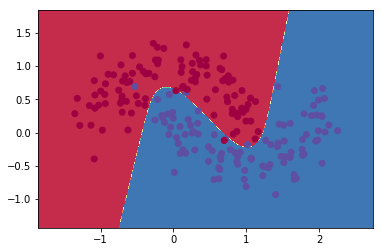

In [9]:
if  __name__  ==  "__main__": 
    X,  y   =   generate_data() 
    model  =   build_model(X,  y,  3,  print_loss=True) 
    visualize(X,  y,  model) 